检测到的木材数量: 58


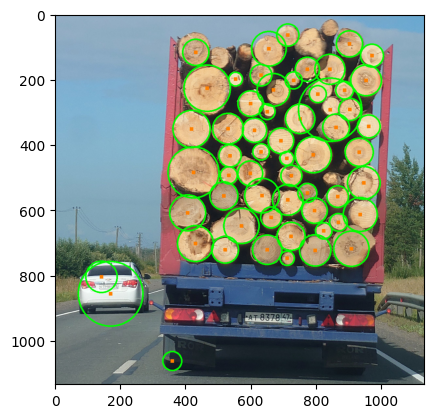

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv.imread('../Task_2/logs-1.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# 应用高斯模糊
gray_blurred = cv.GaussianBlur(gray, (15, 15), 0)

# 检测圆形物体
circles = cv.HoughCircles(
    gray_blurred,
    cv.HOUGH_GRADIENT,
    dp=1.2,  # 分辨率参数
    minDist=30,  # 圆心之间的最小距离
    param1=100,  # Canny边缘检测的阈值
    param2=30,   # 检测圆的阈值，较低的值意味着检测到的圆更可能是实际的圆
    minRadius=20,  # 圆的最小半径
    maxRadius=100  # 圆的最大半径
)

# 防止圆重叠的函数
def remove_overlapping_circles(circles, min_dist):
    # 存储筛选后的圆
    filtered_circles = []
    for i, (x1, y1, r1) in enumerate(circles):
        overlapping = False
        for j, (x2, y2, r2) in enumerate(filtered_circles):
            distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
            # 如果两个圆心的距离小于最小距离，则认为它们重叠
            if distance < min_dist:
                overlapping = True
                break
        if not overlapping:
            filtered_circles.append((x1, y1, r1))
    return filtered_circles

# 如果检测到圆
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    
    # 移除重叠的圆
    circles = remove_overlapping_circles(circles, min_dist=50)  # 调整 min_dist 防止圆重叠

    # 在图像中绘制圆
    for (x, y, r) in circles:
        cv.circle(image, (x, y), r, (0, 255, 0), 4)
        cv.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # 显示结果
    print(f"检测到的木材数量: {len(circles)}")
else:
    print("没有检测到圆形物体")

# 显示图像
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()
